# Final assignment: part D

### Download and clean dataset
The dataset is about the compressive strength of different samples of concrete based on the volumes of the different ingredients that were used to make them. Ingredients include:
1. Cement
2. Blast Furnace Slag
3. Fly Ash
4. Water
5. Superplasticizer
6. Coarse Aggregate
7. Fine Aggregate

In [1]:
import pandas as pd
import numpy as np

concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#### Split data into predictors and target
The target variable in this problem is the concrete sample strength. Therefore, our predictors will be all the other columns.

In [2]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target     = concrete_data['Strength'] # Strength column

Let's do a quick sanity check of the predictors and the target dataframes.

In [3]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [4]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

### Normalize the data
Finally, the last step is to normalize the data by substracting the mean and dividing by the standard deviation.

In [5]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


Let's save the number of predictors to *n_cols* and rename variables for convenience.

In [6]:
n_cols = predictors_norm.shape[1] # number of predictors
X      = predictors_norm
y      = target

### Import Keras library and other required packages 

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy

### Build a Neural Network
Use the Keras library to build a neural network with:
* three hidden layer of 10 nodes, and a ReLU activation function
* adam optimizer and the mean squared error as the loss function.

In [13]:
# create model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1))

# compile model
model.compile(optimizer='adam', loss='mean_squared_error')

### Split the dataset
Randomly split the data into a training and test sets by holding 30% of the data for testing.

In [14]:
# split the dataset into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

print('Size of train set: ' + str(X_train.shape[0]) + ' x ' + str(X_train.shape[1]))
print('Size of test set: ' + str(X_test.shape[0]) + ' x ' + str(X_test.shape[1]))

Size of train set: 721 x 8
Size of test set: 309 x 8


### Train the model
Train the model on the training data using 50 epochs.

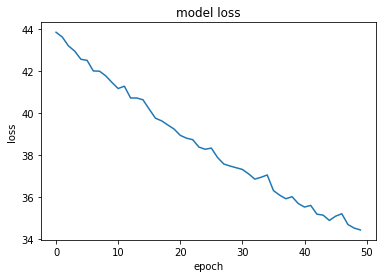

In [18]:
history = model.fit(X_train, y_train, epochs=50, verbose=0)
plt.clf()
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

### Model evaluation
 Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength.

In [19]:
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

44.21443622765848

### Repeat
Evaluate the model creating a list of 50 mean squared errors.

In [22]:
K   = 50
mse = np.zeros(K)

for k in range(0, K):
    # split the dataset into train and test subsets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 4)
    model.fit(X_train, y_train, epochs=50, verbose=0)
    y_pred = model.predict(X_test)
    mse[k] = mean_squared_error(y_test, y_pred)

Report the mean and the standard deviation of the mean squared errors.

MSE mean:  44.211093947885786
MSE std:  0.44741302934402577


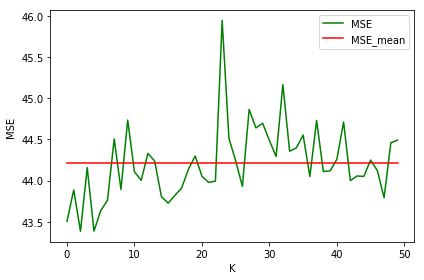

In [23]:
mse_mean = np.mean(mse)
mse_std  = np.std(mse)
print('MSE mean: ', mse_mean)
print('MSE std: ', mse_std)

plt.clf()
plt.plot(range(0, K), mse, 'g')
plt.plot(range(0, K), mse_mean*np.ones(K), 'r')
plt.legend(('MSE', 'MSE_mean'))
plt.ylabel('MSE ')
plt.xlabel('K')
plt.tight_layout()
plt.show()